<a href="https://colab.research.google.com/github/thest122/DU/blob/main/Bloc5_ORAL_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algorithme glouton (bloc 2)

In [1]:
masse={'A':1 ,'B':2 , 'C':3 , 'D':4 }
largeur={'A':1 ,'B':2 , 'C':1 , 'D':2 }
largeur_maxi_plateau = 4
masse_maxi_plateau = 7



def nb_produits(dico):
    resu = 0
    for cle in dico:
        resu += dico[cle]
    return resu



def choisir_produit(commande, masse_libre_plateau, largeur_libre_plateau, ordre):
    """ retourne la clé d'un article qui
    - figure dans la commande et
    - respecte les contraintes de masse et de largeur
    si aucun article ne convient, la fonction retourne None
    """
    for produit in ordre :  
        if (produit in commande and commande[produit]>0 and masse[produit] <= masse_libre_plateau and largeur[produit] <= largeur_libre_plateau):
            return produit
    return None



def compose_plateau(commande, ordre):
	""" retourne un plateau, sous forme de liste de produits choisis par la fonction choisir_produit,
	en respectant les contraintes de masse et de largeur maximales autorisées pour un plateau. 
	"""
	# initialisation d'un plateau
	plateau = []
	masse_libre_plateau = masse_maxi_plateau
	largeur_libre_plateau = largeur_maxi_plateau 
	# choix d'un premier élément
	choix = choisir_produit(commande, masse_libre_plateau, largeur_libre_plateau, ordre)
	while choix != None: # tant que le choix retourne un des produits 
		# inscription du produit sur le plateau
		plateau.append(choix) 
		#actualisation des variables
		masse_libre_plateau -= masse[choix] 
		largeur_libre_plateau -= largeur[choix]
		commande[choix] -= 1
		# essai de choix d'un nouveau produit (si ce n'est pas possible, choix == None )
		choix = choisir_produit(commande, masse_libre_plateau, largeur_libre_plateau, ordre)
	return plateau


def traitement_commande(commande, ordre):
    livraison = []
    com = dict(commande)
    while nb_produits(com)>0:
        livraison.append(compose_plateau(com, ordre))     
    return livraison

## Test de l'algorithme glouton : 3 ordres différents

In [ ]:
commande = {'A': 1, 'B': 1, 'C': 4, 'D': 3}

resu1 = traitement_commande(commande, 'DCBA')
resu2 = traitement_commande(commande, 'DBCA')
resu3 = traitement_commande(commande, 'CDBA')

print( 'DCBA (m), avec ', len(resu1),'plateaux : ', resu1)
print('DBCA (L), avec ', len(resu2),'plateaux : ' ,resu2)
print('CDBA (m/L), avec ', len(resu3),'plateaux : ' ,resu3)

DCBA (m), avec  4 plateaux :  [['D', 'C'], ['D', 'C'], ['D', 'C'], ['C', 'B', 'A']]
DBCA (L), avec  4 plateaux :  [['D', 'B'], ['D', 'C'], ['D', 'C'], ['C', 'C', 'A']]
CDBA (m/L), avec  5 plateaux :  [['C', 'C', 'A'], ['C', 'C'], ['D', 'B'], ['D'], ['D']]


# Proposition pour le bloc 5 : fonction récursive

### Données du problème et fonctions auxilliaires


In [2]:
masse={'A':1 ,'B':2 , 'C':3 , 'D':4 }
largeur={'A':1 ,'B':2 , 'C':1 , 'D':2 }

largeur_maxi_plateau = 4
masse_maxi_plateau = 7



def nb_produits(dico):
    resu = 0
    for cle in dico:
        resu += dico[cle]
    return resu

def masse_plateau(plateau:list)->int:
    resu = 0
    for produit in plateau:
	    resu += masse[produit]
    return resu

def largeur_plateau(plateau:list)->int:
	resu = 0
	for produit in plateau:
		resu += largeur[produit]
	return resu

  


In [ ]:
#test des fonctions auxlilliaires
largeur_plateau(['A','B','B','D']), masse_plateau(['A','B','B','D'])

(7, 9)

## Point de vigilance : définition des paramètres de l'appel récursif 

Exemple avec la commande `{'B': 1,'D':1, 'C': 1}` dans le cas où `masse_maxi_plateau = 5`

La solution attendue contient 2 plateaux par ex : `[B,C]` et `[D]`

    + B
       + D
          + C
       + C
          + D
    + D
       + B
          + C
       + C
          + B
    + C
       + B
          + D
       + D
          + B

In [ ]:
largeur_maxi_plateau = 4
masse_maxi_plateau = 5
couleurs = ['\033[0m' ,'\033[92m', '\033[93m', '\033[91m']

def explore(commande, livraison=[], plateau=[], profondeur=1):
    # cas de base : tous les produits ont été traités
    if nb_produits(commande)==0:
        return livraison+[plateau] if plateau !=[] else livraison
    else: 
        flag = True 
        for produit in commande:
            if commande[produit]>0:
                ###print( '   '*profondeur ,f'{couleurs[1+profondeur%3]}   Livraison:{livraison}  Plateau:{plateau}')
                print( '   '*profondeur ,f'{couleurs[1+profondeur%3]}+ {produit}')
                if masse[produit]+masse_plateau(plateau) <= masse_maxi_plateau and largeur[produit]+largeur_plateau(plateau) <= largeur_maxi_plateau :
                    plateau = plateau + [produit]
                    livraison = list(livraison)
                else: 
                    livraison = livraison + [plateau]
                    plateau = [produit]
                commande[produit]-=1
                #new_commande = {cle:commande[cle]-1 if cle == produit else commande[cle] for cle in commande }
                ####print( '   '*profondeur ,f'{couleurs[1+profondeur%3]}   Livraison:{livraison}  Plateau:{plateau}')
                exploration = explore(commande, livraison, plateau, profondeur+1)
                if flag: 
                    best = exploration 
                    flag = False 
                elif len(exploration)< len(best):
                    best = exploration 
                ##print( '   '*profondeur ,f'{couleurs[0]}   best = {best}')
        print(f"{couleurs[0]}", end='')
        return best


print(explore({'B': 1,'D':1, 'C': 1}))

* [la variable commande](http://www.pythontutor.com/visualize.html#code=masse%3D%7B'A'%3A1%20,'B'%3A2%20,%20'C'%3A3%20,%20'D'%3A4%20%7D%0Alargeur%3D%7B'A'%3A1%20,'B'%3A2%20,%20'C'%3A1%20,%20'D'%3A2%20%7D%0A%0Alargeur_maxi_plateau%20%3D%204%0Amasse_maxi_plateau%20%3D%205%0A%0Adef%20nb_produits%28dico%29%3A%0A%20%20%20%20resu%20%3D%200%0A%20%20%20%20for%20cle%20in%20dico%3A%0A%20%20%20%20%20%20%20%20resu%20%2B%3D%20dico%5Bcle%5D%0A%20%20%20%20return%20resu%0A%0Adef%20masse_plateau%28plateau%3Alist%29-%3Eint%3A%0A%20%20%20%20resu%20%3D%200%0A%20%20%20%20for%20produit%20in%20plateau%3A%0A%20%20%20%20%20%20%20%20resu%20%2B%3D%20masse%5Bproduit%5D%0A%20%20%20%20return%20resu%0A%0Adef%20largeur_plateau%28plateau%3Alist%29-%3Eint%3A%0A%20%20%20%20resu%20%3D%200%0A%20%20%20%20for%20produit%20in%20plateau%3A%0A%20%20%20%20%20%20%20%20resu%20%2B%3D%20largeur%5Bproduit%5D%0A%20%20%20%20return%20resu%0A%0Adef%20explore%28commande,%20livraison%3D%5B%5D,%20plateau%3D%5B%5D%29%3A%0A%20%20%20%20%23%20cas%20de%20base%20%3A%20tous%20les%20produits%20ont%20%C3%A9t%C3%A9%20trait%C3%A9s%0A%20%20%20%20if%20nb_produits%28commande%29%3D%3D0%3A%0A%20%20%20%20%20%20%20%20return%20livraison%2B%5Bplateau%5D%20if%20plateau%20!%3D%5B%5D%20else%20livraison%0A%20%20%20%20else%3A%20%23%20cas%20r%C3%A9cursif%0A%20%20%20%20%20%20%20%20flag%20%3D%20True%20%23drapeau%20servant%20%C3%A0%20rep%C3%A9rer%20le%20premier%20passage%20dans%20la%20boucle%20for%0A%20%20%20%20%20%20%20%20for%20produit%20in%20commande%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20if%20commande%5Bproduit%5D%3E0%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%23%20le%20produit%20peut-il%20%C3%AAtre%20ajout%C3%A9%20au%20plateau%20%3F%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20if%20masse%5Bproduit%5D%2Bmasse_plateau%28plateau%29%20%3C%3D%20masse_maxi_plateau%20and%20largeur%5Bproduit%5D%2Blargeur_plateau%28plateau%29%20%3C%3D%20largeur_maxi_plateau%20%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%23%20oui%20%3A%20le%20produit%20est%20ajout%C3%A9%20au%20plateau%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20plateau.append%28produit%29%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20else%3A%20%23non%20%3A%20le%20produit%20est%20plac%C3%A9%20sur%20un%20nouveau%20plateau%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20livraison.append%28plateau%29%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20plateau%20%3D%20%5Bproduit%5D%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%23%20appel%20r%C3%A9cursif%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20commande%5Bproduit%5D%20-%3D%201%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20exploration%20%3D%20explore%28commande,%20livraison,%20plateau%29%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20if%20flag%3A%20%23%20premier%20passage%20dans%20la%20boucle%20for%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20best%20%3D%20exploration%20%23%20la%20meilleure%20solution%20rencontr%C3%A9e%20est%20la%20seule%20test%C3%A9e%20!%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20flag%20%3D%20False%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20elif%20len%28exploration%29%3C%20len%28best%29%3A%20%23%20on%20conserve%20%C3%A0%20chaque%20passage%20la%20solution%20la%20plus%20courte%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20best%20%3D%20exploration%20%0A%20%20%20%20%20%20%20%20return%20best%0A%0Aprint%28explore%28%7B'B'%3A%201,'D'%3A1,%20'C'%3A%201%7D%29%29&cumulative=false&curInstr=8&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

#### backup

In [ ]:
largeur_maxi_plateau = 4
masse_maxi_plateau = 5
couleurs = ['\033[0m' ,'\033[92m', '\033[93m', '\033[91m']

def explore(commande, livraison=[], plateau=[], profondeur=1):
    # cas de base : tous les produits ont été traités
    if nb_produits(commande)==0:
        return livraison+[plateau] if plateau !=[] else livraison
    else: 
        flag = True 
        for produit in commande:
            if commande[produit]>0:
                ###print( '   '*profondeur ,f'{couleurs[1+profondeur%3]}   Livraison:{livraison}  Plateau:{plateau}')
                print( '   '*profondeur ,f'{couleurs[1+profondeur%3]}+ {produit}')
                if masse[produit]+masse_plateau(plateau) <= masse_maxi_plateau and largeur[produit]+largeur_plateau(plateau) <= largeur_maxi_plateau :
                    plateau = plateau + [produit]
                    livraison = list(livraison)
                else: 
                    livraison = livraison + [plateau]
                    plateau = [produit]
                commande[produit]-=1
                #new_commande = {cle:commande[cle]-1 if cle == produit else commande[cle] for cle in commande }
                ####print( '   '*profondeur ,f'{couleurs[1+profondeur%3]}   Livraison:{livraison}  Plateau:{plateau}')
                exploration = explore(commande, livraison, plateau, profondeur+1)
                if flag: 
                    best = exploration 
                    flag = False 
                elif len(exploration)< len(best):
                    best = exploration 
                ##print( '   '*profondeur ,f'{couleurs[0]}   best = {best}')
        print(f"{couleurs[0]}", end='')
        return best


print(explore({'B': 1,'D':1, 'C': 1}))

## La fonction récursive : `explore`

In [12]:
def explore(commande, livraison=[], plateau=[]):
    # cas de base : tous les produits ont été traités
    if nb_produits(commande)==0:
        return livraison+[plateau] if plateau !=[] else livraison
    else: # cas récursif
        flag = True #drapeau servant à repérer le premier passage dans la boucle for
        for produit in commande:
            if commande[produit]>0:
                # le produit peut-il être ajouté au plateau ?
                if masse[produit]+masse_plateau(plateau) <= masse_maxi_plateau and largeur[produit]+largeur_plateau(plateau) <= largeur_maxi_plateau :
                    # oui : le produit est ajouté au plateau
                    new_plateau = plateau + [produit]
                    new_livraison = list(livraison)
                else: #non : le produit est placé sur un nouveau plateau
                    new_livraison = livraison + [plateau]
                    new_plateau = [produit]
                # appel récursif
                new_commande = {cle:commande[cle]-1 if cle == produit else commande[cle] for cle in commande }
                exploration = explore(new_commande, new_livraison, new_plateau)
                if flag: # premier passage dans la boucle for
                    best = exploration # la meilleure solution rencontrée est la seule testée ! 
                    flag = False 
                elif len(exploration)< len(best): # on conserve à chaque passage la solution la plus courte
                    best = exploration 
        return best

## PREMIERS TESTS

In [ ]:
explore({'A': 3, 'B': 3, 'C': 1, 'D': 1})

[['A', 'A', 'A', 'C'], ['B', 'B'], ['B', 'D']]

In [ ]:
explore({'A': 6, 'B': 1, 'C': 5, 'D': 4})

[['A', 'A', 'A', 'C'],
 ['A', 'A', 'A', 'C'],
 ['B', 'D'],
 ['C', 'D'],
 ['C', 'D'],
 ['C', 'D']]

Cette solution est aussi efficace que le meilleur des trois algos gloutons testés

- DCBA (m), avec  7 plateaux :  [['D', 'C'], ['D', 'C'], ['D', 'C'], ['D', 'C'], ['C', 'B', 'A'], ['A', 'A', 'A', 'A'], ['A']]

- DBCA (L), avec  7 plateaux :  [['D', 'B'], ['D', 'C'], ['D', 'C'], ['D', 'C'], ['C', 'C', 'A'], ['A', 'A', 'A', 'A'], ['A']]

- CDBA (m/L), avec  **6 plateaux** :  [['C', 'C', 'A'], ['C', 'C', 'A'], ['C', 'D'], ['D', 'B'], ['D', 'A', 'A'], ['D', 'A', 'A']]

In [ ]:
# ATTENTION TRÈS LONG : durée maxi estimée à 5 heures... 
#explore({'A': 6, 'B': 3, 'C': 5, 'D': 6})

Pour la commande : {'A': 6, 'B': 3, 'C': 5, 'D': 6}
un algo glouton (m/L) permet de trouver une solution avec  8 plateaux :  

[['C', 'C', 'A'], ['C', 'C', 'A'], ['C', 'D'], ['D', 'B'], ['D', 'B'], ['D', 'B'], ['D', 'A', 'A'], ['D', 'A', 'A']]

# Améliorations de l'efficacité

## Définition d'une limite
On peut définir une **limite** pour la taille du plateau, au delà de laquelle l'exploration est interrompue


In [ ]:
def explore_limite(commande:dict, limit:list, livraison=[], plateau=[]):
    """limit est une solution déjà connue pour le problème : on cherche s'il existe une solution strictement meilleure """
    if nb_produits(commande)==0:
        return livraison+[plateau] if plateau !=[] else livraison
    elif len(livraison)>=len(limit):
        return limit
    else:
        flag = True #drapeau servant à initialiser la recherche de livraison de longeur minimale
        for produit in commande:
            if commande[produit]>0:
                # le produit peut-il être ajouté au plateau ?
                if masse[produit]+masse_plateau(plateau) <= masse_maxi_plateau and largeur[produit]+largeur_plateau(plateau) <= largeur_maxi_plateau :
                    # oui : le produit est ajouté au plateau
                    new_plateau = plateau + [produit]
                    new_livraison = list(livraison)
                else: #non : le produit est placé sur un nouveau plateau
                    new_livraison = livraison + [plateau]
                    new_plateau = [produit]
                # appel récursif
                commande_sans_le_produit = {cle:commande[cle]-1 if cle == produit else commande[cle] for cle in commande }
                exploration = explore_limite(commande_sans_le_produit, limit, new_livraison, new_plateau )
                if flag:
                    best = exploration
                    longueur = len(best)
                    flag = False
                elif len(exploration)< longueur:
                    best = exploration
                    longueur = len(best)
                if longueur < len(limit):
                    limit = best
        return best

def optimise(commande, limit):
    return explore_limite(commande, limit)

def explore_fast(commande):
    glouton = traitement_commande(commande, 'DCBA')
    print(len(glouton),"plateaux" , glouton)
    print()
    return explore_limite(commande, glouton)

commande1 = {'A': 1, 'B': 1, 'C': 1, 'D': 1}
commande2 = {'A': 6, 'B': 1, 'C': 5, 'D': 4}
commande3 = {'A': 6, 'B': 3, 'C': 5, 'D': 4}


In [ ]:
explore_fast(commande2) # 1 min 3s

7 plateaux [['D', 'C'], ['D', 'C'], ['D', 'C'], ['D', 'C'], ['C', 'B', 'A'], ['A', 'A', 'A', 'A'], ['A']]



[['A', 'A', 'A', 'C'],
 ['A', 'A', 'A', 'C'],
 ['B', 'D'],
 ['C', 'D'],
 ['C', 'D'],
 ['C', 'D']]

## Plateaux écrits dans l'ordre alphabétique


In [ ]:
def rempli(plateau, commande):
    enfants = [cle for cle in commande if commande[cle]>0]
    for produit in enfants:
        if masse[produit]+masse_plateau(plateau) <= masse_maxi_plateau \
        and largeur[produit]+largeur_plateau(plateau) <= largeur_maxi_plateau :
            return False
    return True
    
def explore_limite_alpha(commande:dict, limit:list, livraison=[], plateau=[]):
    """limit est une solution déjà connue pour le problème : on cherche s'il existe une solution strictement meilleure """
    if len(plateau)==0 or rempli(plateau,commande):
        enfants = [cle for cle in commande if commande[cle]>0]
    else:
        enfants = [cle for cle in commande if cle >= plateau[-1] and commande[cle]>0]
    ### cas de base
    if nb_produits(commande)==0:
        return livraison+[plateau] if plateau !=[] else livraison
    ### cas limite
    elif len(livraison)>=len(limit) or len(enfants)==0:
        return limit
    ### cas récursif
    else:
        flag = True #drapeau servant à initialiser la recherche de livraison de longeur minimale
        for produit in enfants:
            if commande[produit]>0:
                # le produit peut-il être ajouté au plateau ?
                if masse[produit]+masse_plateau(plateau) <= masse_maxi_plateau and largeur[produit]+largeur_plateau(plateau) <= largeur_maxi_plateau :
                    # oui : le produit est ajouté au plateau
                    new_plateau = plateau + [produit]
                    new_livraison = list(livraison)
                else: #non : le produit est placé sur un nouveau plateau
                    new_livraison = livraison + [plateau]
                    new_plateau = [produit]
                # appel récursif
                commande_sans_le_produit = {cle:commande[cle]-1 if cle == produit else commande[cle] for cle in commande }
                exploration = explore_limite_alpha(commande_sans_le_produit, limit, new_livraison, new_plateau )
                if flag:
                    best = exploration
                    longueur = len(best)
                    flag = False
                elif len(exploration)< longueur:
                    best = exploration
                    longueur = len(best)
                if longueur < len(limit):
                    limit = best
        return best


def explore_rapide(commande):
    glouton = traitement_commande(commande, 'DCBA')
    print(len(glouton),"plateaux" , glouton)
    print()
    return explore_limite_alpha(commande, glouton)

commande1 = {'A': 1, 'B': 1, 'C': 1, 'D': 1}
commande2 = {'A': 6, 'B': 1, 'C': 5, 'D': 4}
commande3 = {'A': 6, 'B': 3, 'C': 5, 'D': 4}

In [ ]:
explore_rapide(commande1)

2 plateaux [['D', 'C'], ['B', 'A']]



[['A', 'B', 'C'], ['D']]

In [ ]:
explore_rapide(commande2) # exécution en  0.8 s

7 [['D', 'C'], ['D', 'C'], ['D', 'C'], ['D', 'C'], ['C', 'B', 'A'], ['A', 'A', 'A', 'A'], ['A']]



[['A', 'A', 'A', 'C'],
 ['A', 'A', 'A', 'C'],
 ['B', 'D'],
 ['C', 'D'],
 ['C', 'D'],
 ['C', 'D']]

In [ ]:
explore(commande2) # exécution en 1 min 15

[['A', 'A', 'A', 'C'],
 ['A', 'A', 'A', 'C'],
 ['B', 'D'],
 ['C', 'D'],
 ['C', 'D'],
 ['C', 'D']]

In [ ]:
explore_fast(commande2) # 1 min 3s

7 plateaux [['D', 'C'], ['D', 'C'], ['D', 'C'], ['D', 'C'], ['C', 'B', 'A'], ['A', 'A', 'A', 'A'], ['A']]



[['A', 'A', 'A', 'C'],
 ['A', 'A', 'A', 'C'],
 ['B', 'D'],
 ['C', 'D'],
 ['C', 'D'],
 ['C', 'D']]

In [ ]:
explore_rapide(commande3)  # exécution en 5.4 s

8 [['D', 'C'], ['D', 'C'], ['D', 'C'], ['D', 'C'], ['C', 'B', 'A'], ['B', 'B'], ['A', 'A', 'A', 'A'], ['A']]



[['A', 'A', 'A', 'A'],
 ['A', 'B', 'C'],
 ['A', 'B', 'C'],
 ['B', 'D'],
 ['C', 'D'],
 ['C', 'D'],
 ['C', 'D']]

### Arborescence des produits

In [9]:
couleurs = ['\033[0m' ,'\033[92m', '\033[93m', '\033[91m']

def rempli(plateau, commande):
    enfants = [cle for cle in commande if commande[cle]>0]
    for produit in enfants:
        if masse[produit]+masse_plateau(plateau) <= masse_maxi_plateau \
        and largeur[produit]+largeur_plateau(plateau) <= largeur_maxi_plateau :
            return False
    return True
    
def show_explore_limite_alpha(commande:dict, limit:list, livraison=[], plateau=[],profondeur=1):
    """limit est une solution déjà connue pour le problème : on cherche s'il existe une solution strictement meilleure """
    if len(plateau)==0 or rempli(plateau,commande):
        enfants = [cle for cle in commande if commande[cle]>0]
    else:
        enfants = [cle for cle in commande if cle >= plateau[-1] and commande[cle]>0]
    ### cas de base
    if nb_produits(commande)==0:
        return livraison+[plateau] if plateau !=[] else livraison
    ### cas limite
    elif len(livraison)>=len(limit) or len(enfants)==0:
        return limit
    ### cas récursif
    else:
        flag = True #drapeau servant à initialiser la recherche de livraison de longeur minimale
        for produit in enfants:
            if commande[produit]>0:
                ###print( '   '*profondeur ,f'{couleurs[1+profondeur%3]}   Livraison:{livraison}  Plateau:{plateau}')
                print( '   '*profondeur ,f'{couleurs[1+profondeur%3]}+ {produit}')
                
                # le produit peut-il être ajouté au plateau ?
                if masse[produit]+masse_plateau(plateau) <= masse_maxi_plateau and largeur[produit]+largeur_plateau(plateau) <= largeur_maxi_plateau :
                    # oui : le produit est ajouté au plateau
                    new_plateau = plateau + [produit]
                    new_livraison = list(livraison)
                else: #non : le produit est placé sur un nouveau plateau
                    new_livraison = livraison + [plateau]
                    new_plateau = [produit]
                # appel récursif
                commande_sans_le_produit = {cle:commande[cle]-1 if cle == produit else commande[cle] for cle in commande }
                exploration = show_explore_limite_alpha(commande_sans_le_produit, limit, new_livraison, new_plateau, profondeur+1 )
                if flag:
                    best = exploration
                    longueur = len(best)
                    flag = False
                elif len(exploration)< longueur:
                    best = exploration
                    longueur = len(best)
                if longueur < len(limit):
                    limit = best
                ##print( '   '*profondeur ,f'{couleurs[0]}   best = {best}')
        return best


def show_explore_rapide(commande):
    glouton = traitement_commande(commande, 'ABCD')
    print("GLOUTON:",len(glouton),"plateaux" , glouton)
    print()
    return show_explore_limite_alpha(commande, glouton)

largeur_maxi_plateau = 4
masse_maxi_plateau = 5
commande1 = {'A': 1, 'B': 1, 'C': 1, 'D': 1}

In [11]:
show_explore_rapide(commande1)

GLOUTON: 3 plateaux [['A', 'B'], ['C'], ['D']]

    + A
       + B
          + C
             + D
          + D
             + C
       + C
          + B
             + D
          + D
             + B
       + D
          + B
             + C
          + C
    + B
       + C
          + A
             + D
          + D
       + D
    + C
       + D
    + D


[['A', 'D'], ['B', 'C']]

# TESTS : comparaison entre fonctions 

4 plateaux [['D', 'C'], ['D', 'C'], ['B', 'B'], ['A', 'A']]

6 plateaux [['D', 'C'], ['D', 'C'], ['D', 'C'], ['B', 'B'], ['B', 'A', 'A'], ['A']]

7 plateaux [['D', 'C'], ['D', 'C'], ['D', 'C'], ['D', 'C'], ['B', 'B'], ['B', 'B'], ['A', 'A', 'A', 'A']]

4 plateaux [['D', 'C'], ['D', 'C'], ['B', 'B'], ['A', 'A']]

6 plateaux [['D', 'C'], ['D', 'C'], ['D', 'C'], ['B', 'B'], ['B', 'A', 'A'], ['A']]

7 plateaux [['D', 'C'], ['D', 'C'], ['D', 'C'], ['D', 'C'], ['B', 'B'], ['B', 'B'], ['A', 'A', 'A', 'A']]



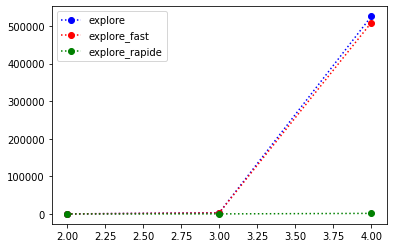

In [ ]:
def genere_commande(n):
    ''' renvoie une commande dont chaque produit a la quantité n'''
    return {'A':n, 'B':n, 'C':n, 'D':n}


import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter


def chrono_sur_taille(f, n):
    ''' renvoie le temps (en milliseconde) d'exécution de la fonction f
    sur une commande de taille 4*n'''
    commande = genere_commande(n)
    start = perf_counter()
    f(commande)
    stop = perf_counter()
    return 1000*(stop - start)

N = 4
abs = []
# explore
ord1 = []
for n in range(2,N+1):
    abs.append(n)
    ord1.append(chrono_sur_taille(explore, n))
plt.plot(np.array(abs), np.array(ord1),  "b:o",label="explore")
# explore_fast
ord2 = []
for n in range(2,N+1):
    ord2.append(chrono_sur_taille(explore_fast, n))
plt.plot(np.array(abs), np.array(ord2),  "r:o",label="explore_fast")
# explore_rapide
ord3 = []
for n in range(2,N+1):
    ord3.append(chrono_sur_taille(explore_rapide, n))
plt.plot(np.array(abs), np.array(ord3),  "g:o",label="explore_rapide")


# graphique
plt.legend()
plt.show() # affiche la figure a l'ecran

In [ ]:
ord1, ord2, ord3

([29.751210000540596, 3043.3577639996656, 523408.33434700104],
 [28.43884300091304, 2915.22449400145, 511719.5772599989],
 [6.567857002664823, 60.737413998140255, 1470.4497889979393])